Data Understanding and Exploration

In [1]:
#for data manipulation
import pandas as pd
#for mathematical operations
import numpy as np
#for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
#for data preprocessing 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#for modeling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score , validation_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score

import datetime as d

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
house = pd.read_csv("train.csv")

In [3]:
#Creating a copy of the data set to to work on
df1 = house.copy(deep= True)

In [4]:
#Printing the first five records
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Exploration

In [5]:
#Shape of the dataframe
df1.shape

(1460, 81)

In [6]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
pd.set_option('display.max_rows', 81)

In [9]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#Checking the null values in each column
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
#Sorting the missing values
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.sort_values

<bound method Series.sort_values of Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64>

In [12]:
#Finding the percenatge of missing values in each column
total=df1.shape[0]
missing_values=missing_values/total
missing_values

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

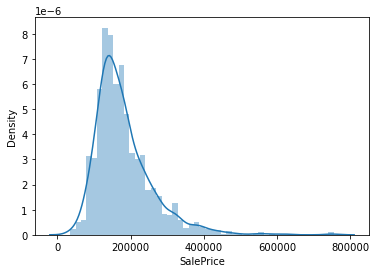

In [13]:
#Introspecting the distribution of target column
sns.distplot(df1['SalePrice']);

In [14]:
#Checking the Skewness for target variable
df1['SalePrice'].skew()

1.8828757597682129

As skewness is greater than 1 we can say that distribution is highly skewed


In [15]:
df1['SalePrice'].kurt()

6.536281860064529

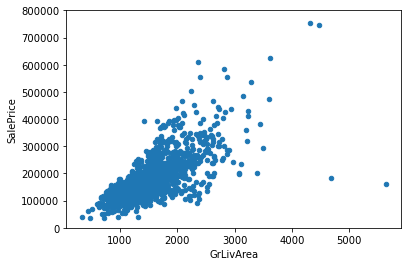

In [16]:
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]],axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

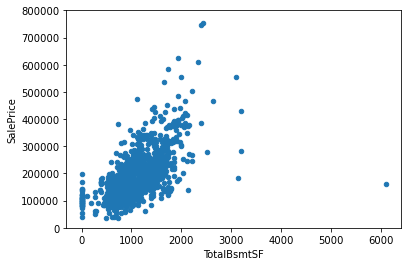

In [17]:
var = 'TotalBsmtSF'
data = pd.concat([df1['SalePrice'], df1[var]],axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

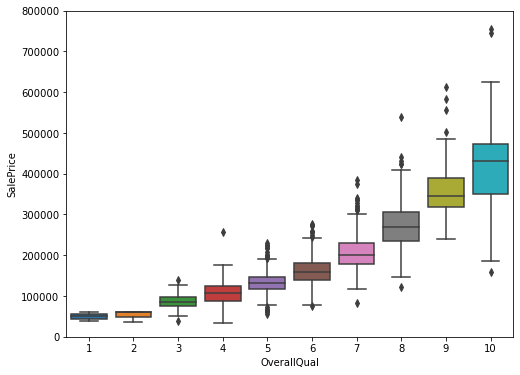

In [18]:
#Outlier Analysis 
#box plot overallqual vs salesprice
var = 'OverallQual'
data = pd.concat([df1['SalePrice'], df1[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000);

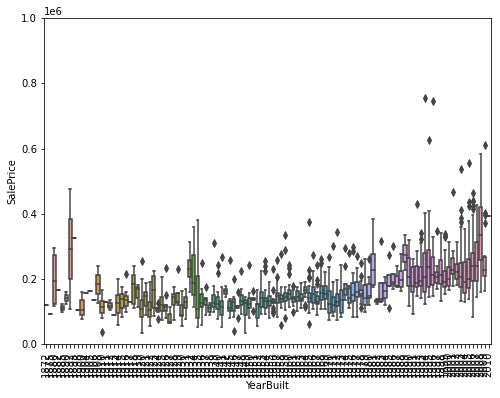

In [19]:
#Outlier Analysis 
#box plot YearBuilt vs salesprice
var = 'YearBuilt'
data = pd.concat([df1['SalePrice'], df1[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0, ymax=1000000);
plt.xticks(rotation=90);

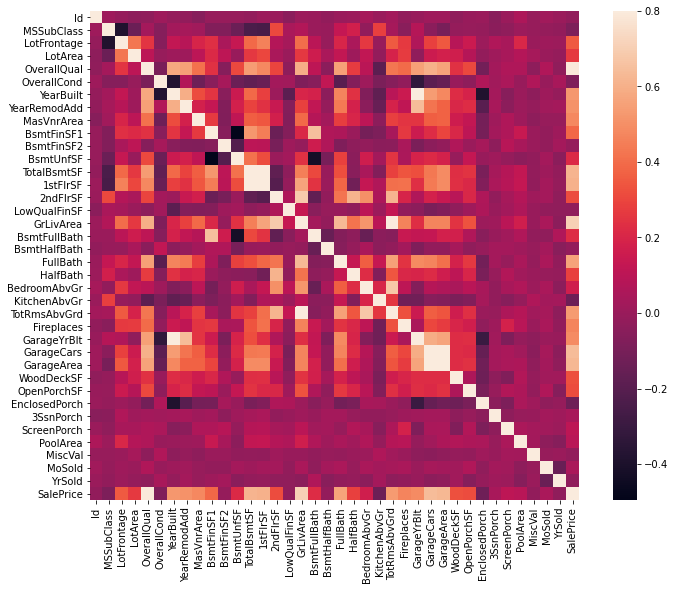

In [20]:
#Correlation Matrix
corrmat = df1.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

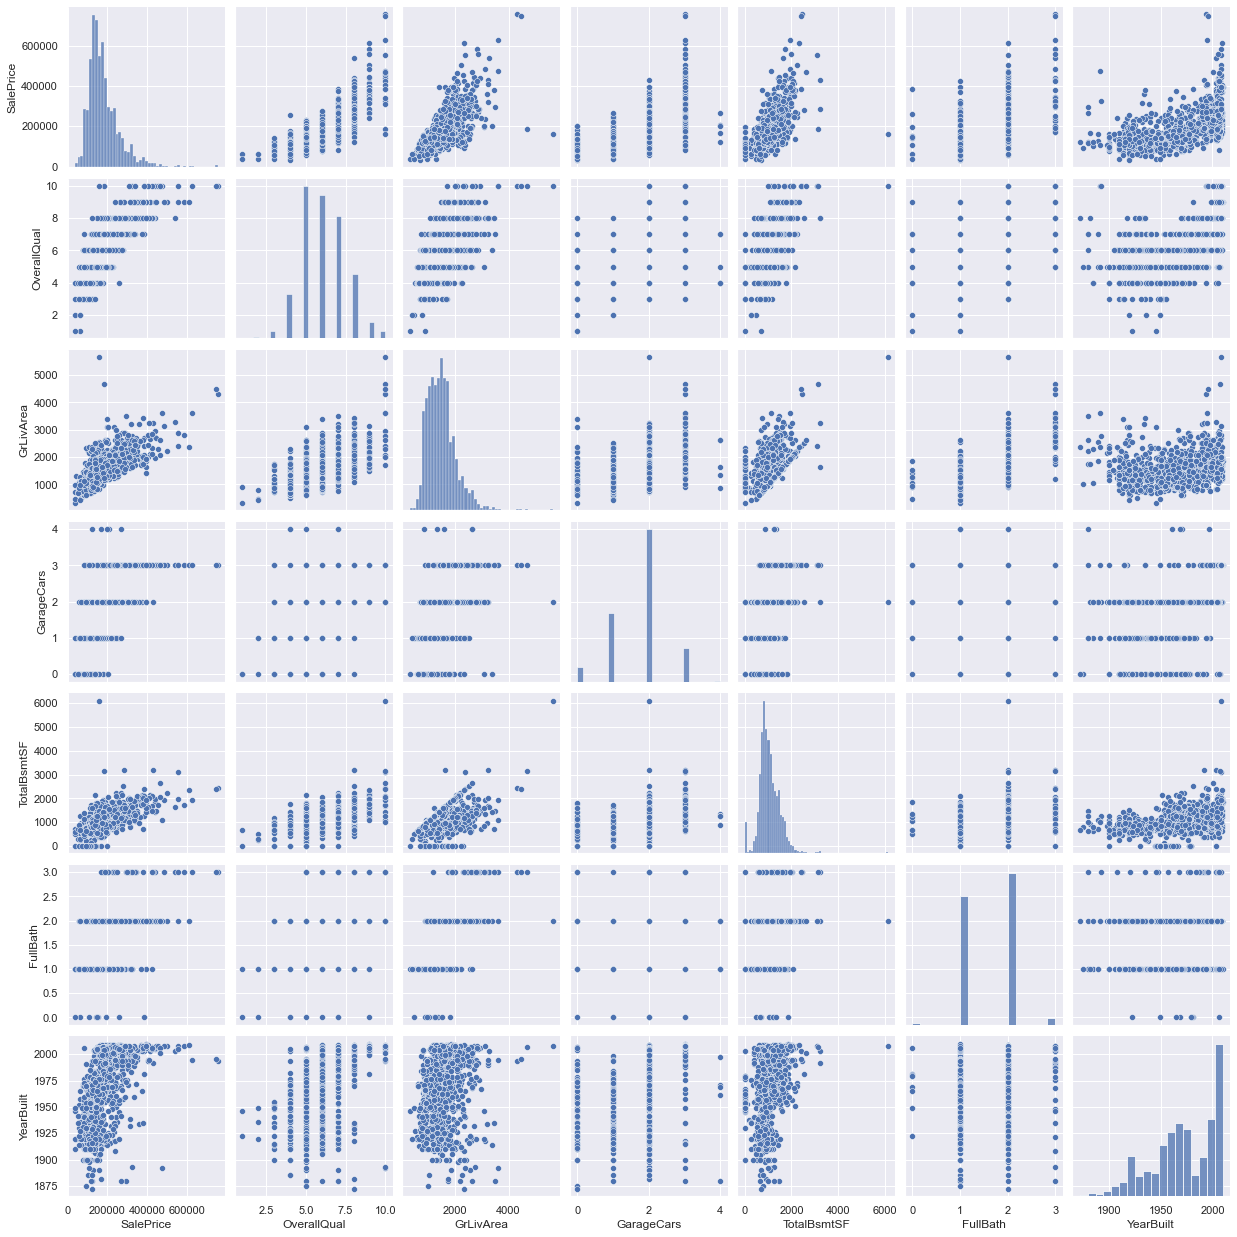

In [21]:
#Scatter plot for the mentioned columns
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df1[cols],height=2.5)
plt.show();

In [22]:
#Percentage of missing values in each column
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

Data Imputation/Validation 


In [23]:
#verify the unique values for the columns
df1['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [24]:
#verify the unique values for the columns
df1['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [25]:
#Checking the unique values for the columns
df1['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [26]:
#Checking the unique values for the columns
df1['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Insights for the above columns

Pool QC is having 99.5 % of missing data which can be response as No pool as per data definition as there is no much variance in the data we can drop this column followed by the columns Alley ,Fence which are having high variance  

In [27]:
df1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [28]:
#Checking the dataframe after dropping the columns
df1.shape

(1460, 77)

In [29]:
#Columns may deliver meaningful insights
null_mean = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [30]:
null_mean

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Lets analyse the columns in null_mean which are eligible for imputation as they might give meaningful insights 

In [31]:
#Analysing the field  'FireplaceQu'
df1['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

As there are nan values we can impute them with NA which means no fireplace as per the data dictionary

In [32]:
#Imputing missing values of FireplaceQu
df1['FireplaceQu'] = df1['FireplaceQu'].replace(np.nan, 'NA')

In [33]:
#Checking the column after imputing
df1['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [34]:
#Checking the column LotFrontage
df1['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

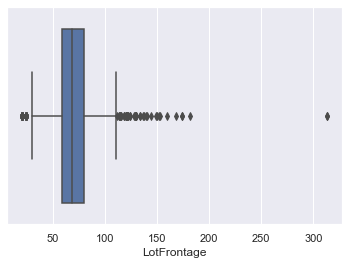

In [35]:
#Check the outliers in the column LotFrontage to decide the value for imputation
sns.boxplot('LotFrontage', data = df1)

As outliers are present for the column LotFrontAge impute the missing values with median

In [36]:
#Imputing with median
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())

In [37]:
df1['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [38]:
#Calculating the number of years that garage has been built
curr_year = int(d.datetime.now().year)
df1['GarageYrBlt'] = curr_year-df1['GarageYrBlt']

<AxesSubplot:xlabel='GarageYrBlt'>

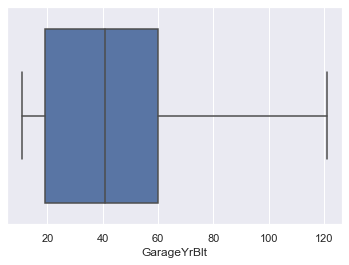

In [39]:
#Checking the outliers for the column GarageYrBlt
sns.boxplot('GarageYrBlt', data = df1)

In [40]:
#Imputing with the mean for the column GarageYrBlt
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mean())

In [41]:
#Caluculating the number of years the house was sold 
df1['YrSold'] = curr_year-df1['YrSold']

In [42]:
#Caluculating the number of years the house was built 
df1['YearBuilt'] = curr_year-df1['YearBuilt']

In [43]:
#Caluculating the number of years the house was built from the current year
df1['YearRemodAdd'] = curr_year-df1['YearRemodAdd']

In [44]:
df1['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [45]:
#Replacing NaN values with NA which says that property doesnt have garage as per the data definition
df1['GarageType'] = df1['GarageType'].replace(np.nan, 'NA')

In [46]:
df1['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [47]:
#Replacing NaN values to NA which says that property doesnt have garage as per the data definition
df1['GarageFinish'] = df1['GarageFinish'].replace(np.nan, 'NA')

In [48]:
df1['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [49]:
#Replacing NaN values to NA which says that property doesnt have garage as per the data definition.
df1['GarageQual'] = df1['GarageQual'].replace(np.nan, 'NA')

In [50]:
#Replacing NaN values to NA which says that property doesnt have garage as per the data definition.
df1['GarageCond'] = df1['GarageCond'].replace(np.nan, 'NA')

In [51]:
df1['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [52]:
#Replacing NaN values to NA which says that the property doesnt have a garage which is also the mode for the data
df1['BsmtExposure'] = df1['BsmtExposure'].replace(np.nan, 'NA')

In [53]:
df1['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [54]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df1['BsmtFinType2'] = df1['BsmtFinType2'].replace(np.nan, 'NA')

In [55]:
df1['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [56]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df1['BsmtFinType1'] = df1['BsmtFinType1'].replace(np.nan, 'NA')

In [57]:
df1['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [58]:
#Replacing NaN values to NA which says that the property doesnt have a garage.
df1['BsmtCond'] = df1['BsmtCond'].replace(np.nan, 'NA')

In [59]:
df1['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [60]:
#Replacing NaN values to NA which says that the property doesnt have a garage.
df1['BsmtQual'] = df1['BsmtQual'].replace(np.nan, 'NA')

<AxesSubplot:xlabel='MasVnrArea'>

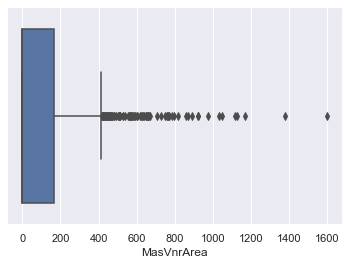

In [61]:
#Check if there are any outliers in the column
sns.boxplot('MasVnrArea', data = df1)

In [62]:
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())

In [63]:
df1['MasVnrArea'].isnull().sum()

0

In [64]:
df1['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [65]:
df1['MasVnrType'].mode()

0    None
dtype: object

In [66]:
#Imputing it with the mode i.e. the None
df1['MasVnrType'] = df1['MasVnrType'].replace(np.nan, 'None')

In [67]:
#Checking the null values for MasVnrType
df1['MasVnrType'].isnull().sum()

0

In [68]:
df1['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [69]:
#Replacing it with the mode i.e. the SBrkr
df1['Electrical'] = df1['Electrical'].replace(np.nan, 'SBrkr')

In [70]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(df1.isnull().sum()/len(df1.index)), 2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
TotalBsmtSF      0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
OpenPorchSF      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

In [71]:
#converting the MSSubClass into a object class as the current column is being identified as int where in actual its having categorical
df1['MSSubClass'] = df1['MSSubClass'].astype(object)

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [73]:

#(df1['Heating'].value_counts()/len(df1.index))*100 #Can remove no much of a variance : 97 % for GasA
#(df1['SaleCondition'].value_counts()/len(df1.index))*100 #Can remove : 82% varaiance for Normal
#(df1['CentralAir'].value_counts()/len(df1.index))*100 #Can remove : 93.5% varaiance for Y
#(df1['LowQualFinSF'].value_counts()/len(df1.index))*100 #Can remove : 98.2% varaiance for 0
#(df1['KitchenAbvGr'].value_counts()/len(df1.index))*100 #Can remove : 95.3% varaiance for 1
#(df1['Functional'].value_counts()/len(df1.index))*100 #Can remove : 93.1% varaiance for Typ
#(df1['SaleType'].value_counts()/len(df1.index))*100 #Can remove : 86% varaiance for WD
#MoSold might not be a highly influential factor so we can drop it
#(df1['MiscVal'].value_counts()/len(df1.index))*100 #Can remove : 96% varaiance for 0 
#(df1['PoolArea'].value_counts()/len(df1.index))*100 #Can remove : 99% varaiance for 0 
#(df1['ScreenPorch'].value_counts()/len(df1.index))*100 #Can remove : 92% varaiance for 0 
#(df1['3SsnPorch'].value_counts()/len(df1.index))*100 #Can remove : 98% varaiance for 0
#(df1['PavedDrive'].value_counts()/len(df1.index))*100 #Can remove : 92% varaiance for Y
#(df1['PavedDrive'].value_counts()/len(df1.index))*100 #Can remove : 92% varaiance for Y
#(df1['EnclosedPorch'].value_counts()/len(df1.index))*100 #Can remove : 86% varaiance for Y
#(df1['BsmtFinSF2'].value_counts()/len(df1.index))*100 #Can remove : 88% varaiance for 0
#(df1['Condition2'].value_counts()/len(df1.index))*100 #Can remove : 98% varaiance for Norm
#(df1['BldgType'].value_counts()/len(df1.index))*100 #Can remove : 84% varaiance for 1Fam
#(df1['RoofStyle'].value_counts()/len(df1.index))*100 #Can remove : 78% varaiance for Gable
#(df1['RoofMatl'].value_counts()/len(df1.index))*100 #Can remove : 98% varaiance for CompShg
#(df1['ExterCond'].value_counts()/len(df1.index))*100 #Can remove : 87% varaiance for TA
#(df1['Utilities'].value_counts()/len(df1.index))*100 #Can remove : 99.9% varaiance for AllPub
#(df1['Electrical'].value_counts()/len(df1.index))*100 #Can remove : 99.9% varaiance for SBrkr
#(df1['BsmtCond'].value_counts()/len(df1.index))*100 #Can remove : 90% varaiance for TA
#(df1['BsmtFinType2'].value_counts()/len(df1.index))*100 #Can remove : 90% varaiance for Unf
#(df1['GarageQual'].value_counts()/len(df1.index))*100 #Can remove : 89% varaiance for TA
#(df1['GarageCond'].value_counts()/len(df1.index))*100 #Can remove : 90% varaiance for TA
#'Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea', 
#'ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 
#'ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'


Dropping the above mentioned columns 

In [74]:
#Dropping the columns
df1.drop(['Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea','ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl','ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'], axis =1, inplace = True)

In [75]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice'],
      dtype='object')

In [76]:
#Checking for null values again
df1.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
YrSold          0
SalePrice       0
dtype: int64

In [77]:
types_train = df1.dtypes
types_train

Id                int64
MSSubClass       object
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
Foundation       object
BsmtQual         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
HeatingQC        object
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Fireplaces        int64
FireplaceQu     

In [78]:
cat_train = types_train[types_train == 'object']

In [79]:
cat_train

MSSubClass      object
MSZoning        object
Street          object
LotShape        object
LandContour     object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
HouseStyle      object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
ExterQual       object
Foundation      object
BsmtQual        object
BsmtExposure    object
BsmtFinType1    object
HeatingQC       object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
dtype: object

In [80]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

int64      25
object     23
float64     3
Name: 0, dtype: int64

In [81]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

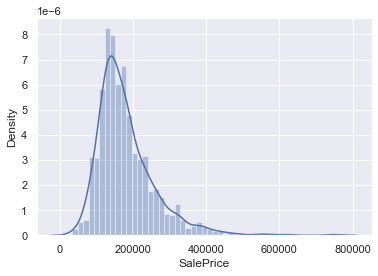

In [82]:
sns.distplot(df1['SalePrice']);

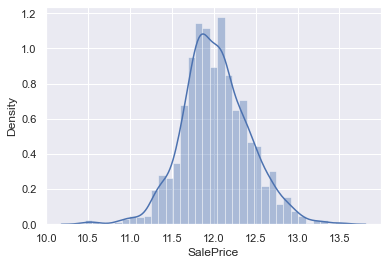

In [83]:
#Remove skewness
sns.distplot(np.log(df1['SalePrice']));

In [84]:
#After removing the skewness
df1['SalePrice'].skew()

1.8828757597682129

In [85]:
df1['RevisedPrice'] = np.log(df1['SalePrice']);
df1['RevisedPrice'].skew()

0.12133506220520406

In [86]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'RevisedPrice'],
      dtype='object')

Data Exploration
To perform linear regression, target variable should relate linearly with least one another numeric variable.
We'll first subset the list of all independent numeric variables, and then make a pairwise plot.

In [87]:
num_train = df1.select_dtypes(exclude=['object'])
num_train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,RevisedPrice
0,1,65.0,8450,7,5,18,18,196.0,706,150,...,8,0,18.0,2,548,0,61,13,208500,12.247694
1,2,80.0,9600,6,8,45,45,0.0,978,284,...,6,1,45.0,2,460,298,0,14,181500,12.109011
2,3,68.0,11250,7,5,20,19,162.0,486,434,...,6,1,20.0,2,608,0,42,13,223500,12.317167
3,4,60.0,9550,7,5,106,51,0.0,216,540,...,7,1,23.0,3,642,0,35,15,140000,11.849398
4,5,84.0,14260,8,5,21,21,350.0,655,490,...,9,1,21.0,3,836,192,84,13,250000,12.429216


In [88]:
df1['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [89]:
df1['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

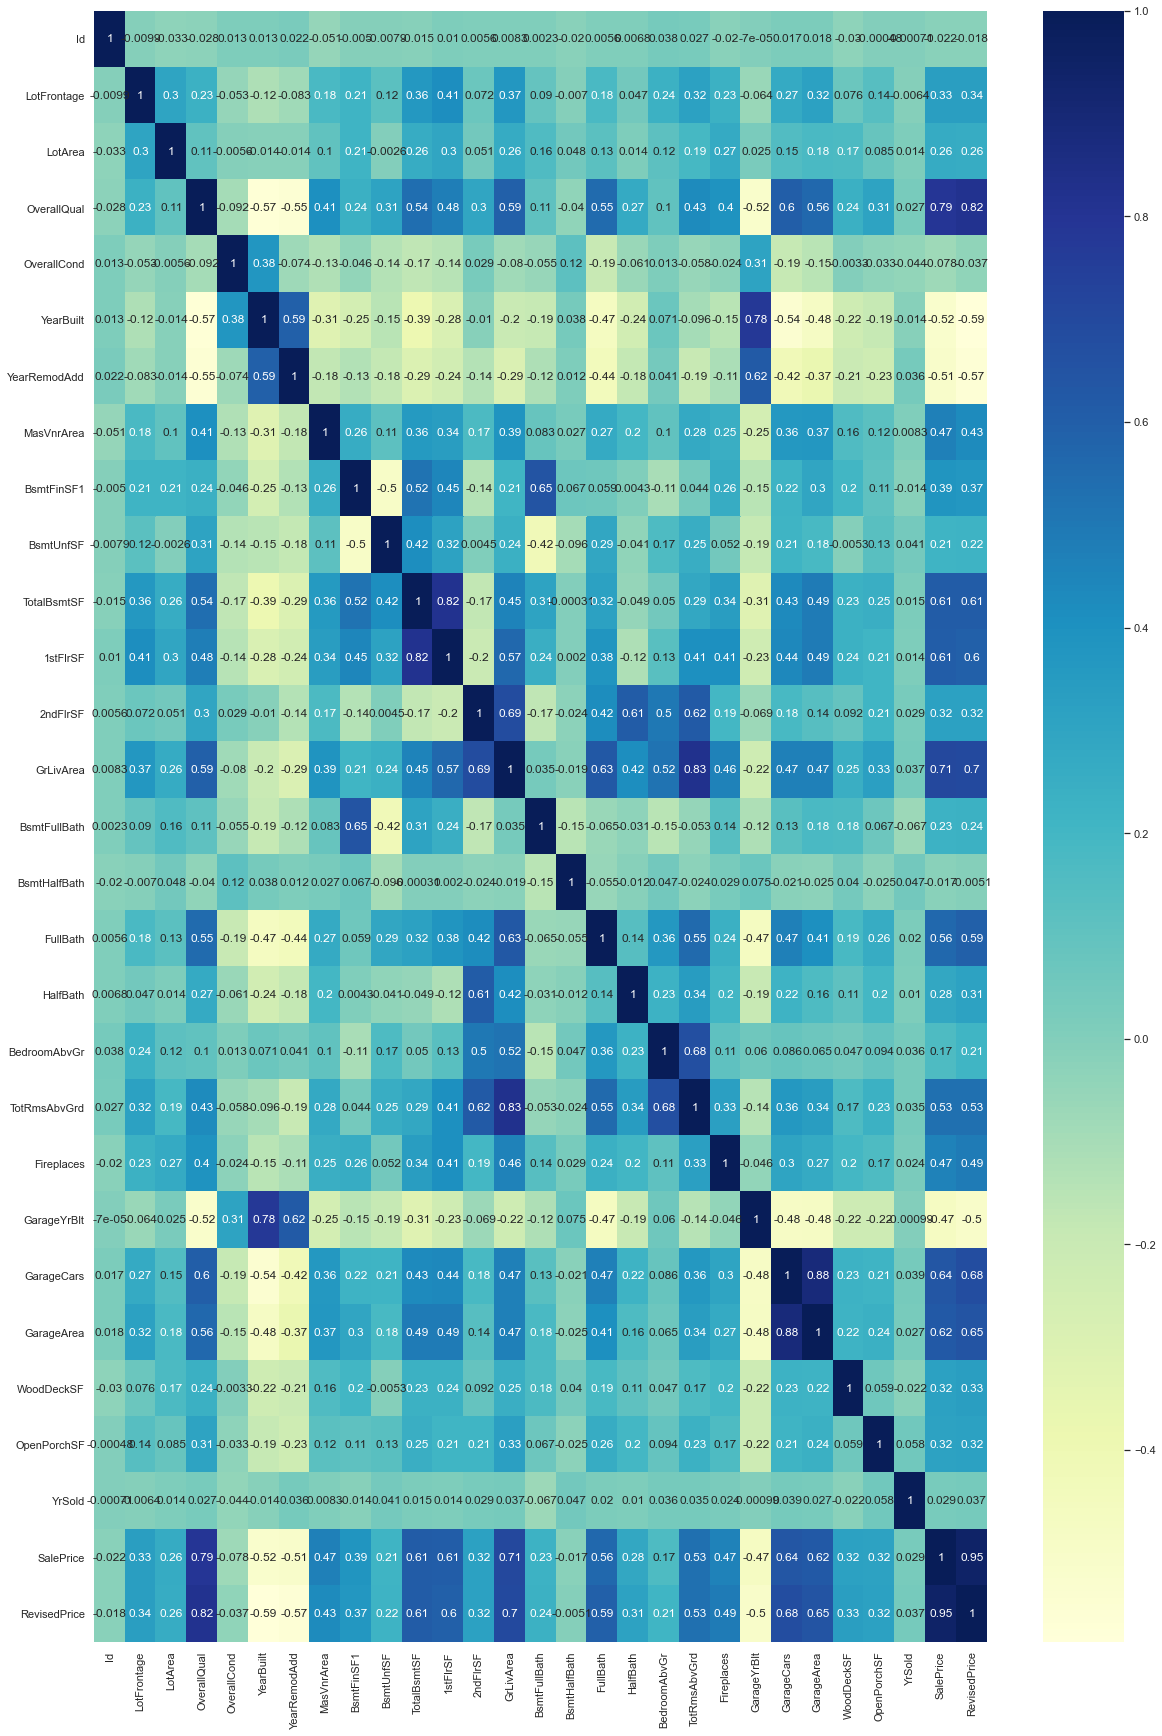

In [90]:
#Creating a heatmap to understand the corelation.
plt.figure(figsize = (20,30)) 
sns.heatmap(num_train.corr(),annot = True,cmap="YlGnBu")
plt.show()

Insights from the heatmap :

OverallQual MasVnrArea TotalBsmtSF 1stFlrSF GrLivArea FullBath TotRmsAbvGrd GarageCars GarageArea are positively correalted with SalesPrice
YearBuilt YearRemodAdd are negatively correlated with Sales Price

Building a model

In [91]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'RevisedPrice'],
      dtype='object')

In [92]:
X = df1.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]
y = df1['RevisedPrice']

In [93]:
# creating dummy variables for categorical variables
df1_cat = X.select_dtypes(include=['object'])
df1_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Story,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,2Story,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,2Story,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [94]:
# convert into dummies
df1_dummies = pd.get_dummies(df1_cat, drop_first=True)
df1_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [95]:
# drop categorical variables 
X = X.drop(list(df1_cat.columns), axis=1)

In [96]:
# concat dummy variables with X
X = pd.concat([X, df1_dummies], axis=1)

In [97]:
# scaling the data
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

In [98]:
#Splitting into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

Ridge and Lasso Regression

In [99]:
#List of Alphas
params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]}
params

{'alpha': [0.0001,
  0.001,
  0.01,
  0.05,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  20.0,
  50.0,
  100.0,
  500.0,
  1000.0]}

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import sklearn.metrics as metrics
import os

In [101]:
# list of alphas 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006809,0.000752,0.003393,0.000802,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.006477,0.001290,0.003324,0.000786,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.007423,0.001085,0.003181,0.000745,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.007590,0.000803,0.004179,0.000404,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.007187,0.000396,0.003384,0.000481,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


In [103]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006809,7.521716e-04,0.003393,0.000802,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.006477,1.289981e-03,0.003324,0.000786,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.007423,1.085178e-03,0.003181,0.000745,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.007590,8.034230e-04,0.004179,0.000404,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.007187,3.960008e-04,0.003384,0.000481,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599
5,0.006383,1.352747e-03,0.003590,0.000798,0.2,{'alpha': 0.2},-0.095814,-0.097054,-0.104834,-0.091053,...,-0.097478,0.004465,22,-0.078034,-0.067578,-0.072183,-0.080029,-0.077823,-0.075130,0.004591
6,0.006882,1.224887e-04,0.003244,0.000386,0.3,{'alpha': 0.3},-0.095826,-0.096958,-0.104809,-0.090994,...,-0.097441,0.004474,21,-0.078024,-0.067610,-0.072180,-0.080045,-0.077824,-0.075137,0.004583
7,0.005386,7.977725e-04,0.002254,0.000519,0.4,{'alpha': 0.4},-0.095840,-0.096868,-0.104789,-0.090932,...,-0.097405,0.004485,20,-0.078014,-0.067641,-0.072177,-0.080061,-0.077826,-0.075144,0.004576
8,0.005257,8.872017e-04,0.002532,0.000455,0.5,{'alpha': 0.5},-0.095857,-0.096783,-0.104773,-0.090867,...,-0.097372,0.004499,19,-0.078005,-0.067671,-0.072175,-0.080076,-0.077830,-0.075151,0.004569
9,0.006132,7.744063e-04,0.003432,0.000476,0.6,{'alpha': 0.6},-0.095873,-0.096702,-0.104760,-0.090800,...,-0.097340,0.004514,18,-0.077998,-0.067699,-0.072174,-0.080091,-0.077833,-0.075159,0.004563


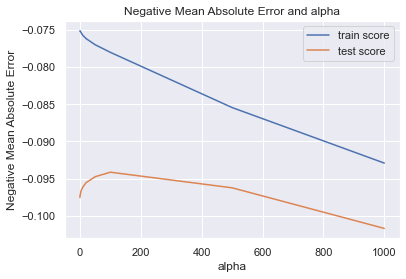

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [105]:
#Best estimator 
model_cv.best_estimator_

Ridge(alpha=100)

In [106]:
#Best score
model_cv.best_score_

-0.0941458456001448

In [107]:
#Best Params
model_cv.best_params_

{'alpha': 100}

In [108]:
#Using the best hyper parameter obtained from above for the analysis 
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.80271628e-03,  1.73903140e-02,  6.28766532e-02,  3.74476105e-02,
       -2.62568097e-02, -2.31702539e-02,  3.17720331e-03, -1.08348294e-03,
        4.27586345e-03,  9.80665331e-03,  2.83588265e-02,  2.46357923e-02,
        4.07317110e-02,  2.15385517e-02,  3.28665045e-04,  2.28668592e-02,
        2.00444399e-02,  1.09856989e-02,  1.81769787e-02,  8.33989794e-03,
       -5.71667258e-03,  2.84044367e-02,  1.64090567e-02,  1.03088771e-02,
       -1.29182493e-03,  5.57504126e-03, -2.08090297e-02, -2.69343477e-03,
       -4.60225130e-03,  3.38822111e-03, -5.94354412e-03,  9.77909352e-03,
        9.62490904e-03, -3.60753593e-03,  1.39589416e-03, -7.13878412e-03,
       -1.55271464e-02, -2.27202191e-02, -8.27012027e-03, -8.53540264e-03,
        1.40358949e-02,  5.66952369e-03,  2.51479887e-02,  1.13397451e-02,
        6.26970027e-03,  4.66621126e-03, -7.97932606e-03,  2.97957888e-03,
        1.02425215e-02,  1.02343206e-02,  1.72015292e-02,  9.21440782e-03,
       -8.12045004e-03, -

In [109]:
# Verifying for the training dataset for the accuracy
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred))

0.890937913818188

In [110]:
# Verifying for the test dataset for the accuracy
y_test_pred = ridge.predict(X_test)
metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred))

0.8873810478530914

In [111]:
# Finding model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', -0.006802716282671862),
 ('LotFrontage', 0.017390314041542888),
 ('LotArea', 0.06287665319187369),
 ('OverallQual', 0.03744761051702548),
 ('OverallCond', -0.026256809695916004),
 ('YearBuilt', -0.02317025388406806),
 ('YearRemodAdd', 0.003177203313399369),
 ('MasVnrArea', -0.0010834829393459562),
 ('BsmtFinSF1', 0.004275863448854203),
 ('BsmtUnfSF', 0.009806653308973253),
 ('TotalBsmtSF', 0.02835882649736359),
 ('1stFlrSF', 0.024635792299429457),
 ('2ndFlrSF', 0.04073171098883416),
 ('GrLivArea', 0.021538551678001998),
 ('BsmtFullBath', 0.00032866504483124864),
 ('BsmtHalfBath', 0.02286685916480496),
 ('FullBath', 0.02004443994223954),
 ('HalfBath', 0.010985698861737725),
 ('BedroomAbvGr', 0.018176978677836055),
 ('TotRmsAbvGrd', 0.008339897936415328),
 ('Fireplaces', -0.0057166725779815505),
 ('GarageYrBlt', 0.02840443669582844),
 ('GarageCars', 0.01640905669093854),
 ('GarageArea', 0.010308877095362094),
 ('WoodDeckSF', -0.0012918249322360189),
 ('OpenPorchSF', 0.00557

In [112]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
ridge_list = list(zip(cols, model_parameters))

In [113]:
final_pred_ridge = []
for i in range(len(ridge_list)):
    if(ridge_list[i][1]!=0):
        final_pred_ridge.append(ridge_list[i][0])


In [114]:
len(ridge_list)

171

Number of predictors are 171

In [115]:
#Double the alpha value from 100 to 200
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-3.31383403e-03,  1.54900882e-02,  5.64765985e-02,  3.37464530e-02,
       -2.11240193e-02, -2.36658234e-02,  5.56189351e-03,  3.17082642e-03,
        4.60711885e-03,  1.35203870e-02,  2.71465850e-02,  1.97355464e-02,
        3.59552479e-02,  1.90443425e-02,  1.63960334e-04,  2.15225487e-02,
        1.82958265e-02,  1.06932801e-02,  2.01390903e-02,  1.19501884e-02,
       -7.12561134e-03,  2.56884790e-02,  1.81841183e-02,  1.06505247e-02,
        6.08792477e-05,  4.90169818e-03, -2.06651180e-02, -2.37590609e-03,
       -2.87511434e-03,  3.00854403e-03, -1.94014805e-03,  9.80290838e-03,
        7.19613139e-03, -3.10087194e-03,  1.04488721e-03, -6.41514054e-03,
       -1.20377311e-02, -1.84230647e-02, -7.37423955e-03, -8.13649814e-03,
        1.06702726e-02,  3.36431249e-03,  1.72122371e-02,  1.48519560e-03,
        5.60514366e-03,  4.38369090e-03, -8.91127123e-03,  1.55093943e-03,
        8.31710889e-03,  8.23389040e-03,  1.28531505e-02,  9.63692604e-03,
       -6.65888768e-03, -

In [116]:
# Analysing for new alpha value
y_train_pred_dble = ridge_double.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred_dble)

0.9098089180129811

In [117]:
#Calculating rsquare for train data
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_dble)
rssbytss = 1-rsquare
rssbytss

0.09019108198701886

In [118]:
#Calculating rsquare for test data
y_test_pred = ridge_double.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8783127575513227

In [119]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_dble_list = list(zip(cols, model_parameters))

In [120]:
ridge_dble_list

[('constant', -0.0033138340299703885),
 ('LotFrontage', 0.015490088210253423),
 ('LotArea', 0.05647659850511366),
 ('OverallQual', 0.03374645295005629),
 ('OverallCond', -0.02112401931848236),
 ('YearBuilt', -0.0236658234219143),
 ('YearRemodAdd', 0.005561893512113853),
 ('MasVnrArea', 0.003170826415276796),
 ('BsmtFinSF1', 0.004607118849838805),
 ('BsmtUnfSF', 0.013520387048238061),
 ('TotalBsmtSF', 0.027146584954377447),
 ('1stFlrSF', 0.01973554640688917),
 ('2ndFlrSF', 0.03595524791417979),
 ('GrLivArea', 0.019044342543898852),
 ('BsmtFullBath', 0.0001639603344916791),
 ('BsmtHalfBath', 0.021522548672050383),
 ('FullBath', 0.018295826533374103),
 ('HalfBath', 0.010693280056870022),
 ('BedroomAbvGr', 0.020139090307311633),
 ('TotRmsAbvGrd', 0.011950188408634026),
 ('Fireplaces', -0.007125611335669056),
 ('GarageYrBlt', 0.025688479043949594),
 ('GarageCars', 0.018184118270351914),
 ('GarageArea', 0.010650524695952507),
 ('WoodDeckSF', 6.087924774166788e-05),
 ('OpenPorchSF', 0.0049016

In [121]:
final_pred_ridge_double =[]
for i in range(len(ridge_dble_list)):
    if(ridge_dble_list[i][1]!=0):
        final_pred_ridge_double.append(ridge_dble_list[i][0])

In [122]:
len(final_pred_ridge_double)

170

In [123]:
#Lasso 
lasso = Lasso()
folds = 5
model_lasso_cv = GridSearchCV(estimator = lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006809,0.000752,0.003393,0.000802,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,...,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.006477,0.001290,0.003324,0.000786,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,...,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.007423,0.001085,0.003181,0.000745,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,...,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.007590,0.000803,0.004179,0.000404,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,...,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.007187,0.000396,0.003384,0.000481,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,...,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


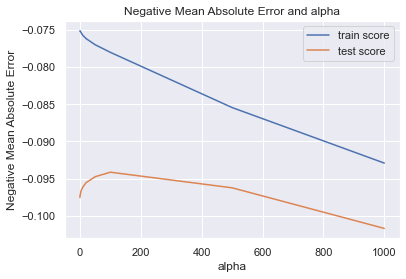

In [125]:
#Plot mean test and train scores against alpha
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')
#Plotting
plt.plot(cv_results_lasso['param_alpha'] , cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'] , cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [126]:
#Best Estimator
model_lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [127]:
#Best score
model_lasso_cv.best_score_

-0.09291881873263373

In [128]:
#Best parameters
model_lasso_cv.best_params_

{'alpha': 0.001}

In [129]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [130]:
lasso.coef_

array([-9.99578312e-03,  1.84249397e-02,  7.51006739e-02,  4.17795743e-02,
       -4.75934387e-02, -2.11751767e-02, -0.00000000e+00, -0.00000000e+00,
        4.68766402e-03,  0.00000000e+00,  8.74891105e-05,  0.00000000e+00,
        9.91391956e-02,  2.36554998e-02,  0.00000000e+00,  1.93155608e-02,
        1.68519902e-02,  8.76654530e-03,  9.28262428e-03,  0.00000000e+00,
       -9.31605582e-04,  4.21052728e-02,  5.05697748e-03,  8.98906817e-03,
       -3.73570945e-04,  4.26484769e-03, -2.12996008e-02, -3.01766081e-03,
       -7.45831854e-04,  1.30575747e-03, -1.88064634e-02,  3.05935938e-03,
        3.01643296e-03, -4.10256654e-03,  0.00000000e+00, -7.41564343e-03,
       -1.79686245e-02, -3.42160823e-02, -9.32049888e-03, -8.87856675e-03,
        4.26874672e-02,  2.14062882e-02,  8.84176590e-02,  5.99136884e-02,
        5.03382218e-03,  4.32384060e-03, -6.25009374e-03,  2.25850481e-03,
        1.14876219e-02,  1.29799730e-02,  2.17042536e-02,  7.59250636e-03,
       -7.52751026e-03, -

In [131]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [132]:
lasso_list

[('constant', -0.009995783124817298),
 ('LotFrontage', 0.018424939673390973),
 ('LotArea', 0.07510067387513485),
 ('OverallQual', 0.04177957426537631),
 ('OverallCond', -0.0475934386812589),
 ('YearBuilt', -0.021175176662136745),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.004687664021656259),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 8.748911050118316e-05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09913919561888089),
 ('GrLivArea', 0.02365549984606827),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.019315560813582346),
 ('FullBath', 0.01685199023061048),
 ('HalfBath', 0.008766545304624238),
 ('BedroomAbvGr', 0.009282624280083869),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0009316055822936864),
 ('GarageYrBlt', 0.04210527281376895),
 ('GarageCars', 0.005056977481924695),
 ('GarageArea', 0.008989068165814872),
 ('WoodDeckSF', -0.0003735709451526654),
 ('OpenPorchSF', 0.004264847685300734),
 ('YrSold', -0.021299600844254578),
 ('MSSubClass_30', -0.0030176608129431704),
 ('MSS

In [133]:
# predictors with non zero co-efficients
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i][0])

constant
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
YrSold
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_St

In [134]:

ln = Lasso(alpha=0.001)
ln.fit(X_train, y_train)

# predict
y_train_pred = ln.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ln.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9183979804109303
The test accuracy is:
0.8851756193022349


In [135]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimal alpha for ridge are:127


Train and testing accuracy are decent enough

In [136]:
#Double the alpha for Lasso from 0.001 to 0.002

ln_double = Lasso(alpha=0.002)
ln_double.fit(X_train, y_train)

# predict
y_train_pred_double = ln_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = ln.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9114997487189402
The test accuracy is:
0.8851756193022349


In [137]:
model_parameters = list(ln_double.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ln_double.coef_)
am = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(am)):
    if(am[i][1]!=0):
        final_pred.append(am[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:113


In [138]:
am

[('constant', -0.004924612585877162),
 ('LotFrontage', 0.01731303823621963),
 ('LotArea', 0.08340793685284573),
 ('OverallQual', 0.04219861598715639),
 ('OverallCond', -0.04958387635114405),
 ('YearBuilt', -0.022668907941129805),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.002622684268774103),
 ('BsmtUnfSF', 0.0008811571237404616),
 ('TotalBsmtSF', 0.009361412220262474),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09141208626563044),
 ('GrLivArea', 0.024520147466809562),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.017443304848615632),
 ('FullBath', 0.014755542866428164),
 ('HalfBath', 0.007733595498511244),
 ('BedroomAbvGr', 0.009847177841288007),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', 0.043193675704733495),
 ('GarageCars', 0.0036005243406502037),
 ('GarageArea', 0.009150986283887379),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0034922449209752577),
 ('YrSold', -0.019077933364936985),
 ('MSSubClass_30', -0.0014515205955695862),
 ('MSSubClass_40', -0

In [139]:
d = len(final_pred)
d

113

In [140]:
n = len(X)
n

1460

In [141]:
#Removing the top 5 contributors from the lasso regression:
X_train_new = X_train.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [142]:
X_test_new = X_test.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [143]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=166)

In [144]:
model_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [145]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

In [146]:
#Best estimator
model_lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [147]:
#Best score
model_lasso_cv.best_score_

-0.095324646365298

In [148]:
#Best Parameters
model_lasso_cv.best_params_

{'alpha': 0.001}

In [149]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [150]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [151]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9137709634530005
The test accuracy is:
0.8822024070495238


In [152]:
lasso_list

[('constant', -0.006896900233652806),
 ('LotFrontage', 0.07550896384718872),
 ('LotArea', 0.04466188157885121),
 ('OverallQual', -0.05002667040169353),
 ('OverallCond', -0.019793367920580947),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.0007346334810972969),
 ('MasVnrArea', 0.006163251148203103),
 ('BsmtFinSF1', 0.0),
 ('BsmtUnfSF', 0.00475001790732039),
 ('TotalBsmtSF', 0.09514141329187167),
 ('1stFlrSF', 0.025621220706146013),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.022377880020928057),
 ('BsmtFullBath', 0.019215063289459475),
 ('BsmtHalfBath', 0.008576815952747657),
 ('FullBath', 0.00921494328902137),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.03839247495565958),
 ('Fireplaces', 0.007830786169725788),
 ('GarageYrBlt', 0.011024507439380318),
 ('GarageCars', -0.0006065623478665606),
 ('GarageArea', 0.0045955678831878935),
 ('WoodDeckSF', -0.016114576173749676),
 ('OpenPorchSF', -0.0034945163993902596),
 ('YrSold', -0.0),
 ('MSSubClass_30', 0.009616688535713411),
 ('M

In [153]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:129
